In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:


from unicodedata import decimal


df_ads = pd.read_excel('S11_ADS.xlsx', 'Sierpinski_simetric', decimal=',')
df_ads.dtypes
df_ads.rename(columns = {'dB(S11_fitted)':'S11_ADS'}, inplace = True)

# df_ads['freq'] = round(df_ads['freq'])


df_ads

,freq,S11_ADS
0,0.000000e+00,3.510152e-13
1,8.196129e+00,3.529439e-13
2,8.196129e+01,2.603684e-13
3,8.196129e+02,-8.952816e-12
4,8.196129e+03,-9.298103e-10
...,...,...
508,1.482639e+10,-5.689687e+00
509,1.486979e+10,-5.448207e+00
510,1.491319e+10,-5.188772e+00
511,1.495660e+10,-4.900588e+00


In [3]:
df_cst = pd.read_excel('S11_CST.xlsx', 'Sierpinski_simetric', decimal=',')
df_cst.dtypes
df_cst.rename(columns = {'Frequency / GHz':'freq', 'S1,1/abs,dB':'S11_CST'}, inplace = True)

df_cst['freq'] = round(df_cst['freq'],2)*10**9

df_cst

,freq,S11_CST
0,1.000000e+08,-0.062392
1,1.100000e+08,-0.050567
2,1.300000e+08,-0.038943
3,1.400000e+08,-0.028048
4,1.600000e+08,-0.018383
...,...,...
996,1.494000e+10,-8.429945
997,1.496000e+10,-8.461689
998,1.497000e+10,-8.494530
999,1.499000e+10,-8.528150


In [4]:
# df = pd.merge_ordered(df_cst, df_ads, on='freq')

df = df_ads.merge(df_cst, how= 'outer', on='freq')
df.sort_values(by='freq', inplace=True)
corr_pearson = df.corr(method='pearson')
corr_kendall = df.corr(method='kendall')
corr_spearman = df.corr(method='spearman')

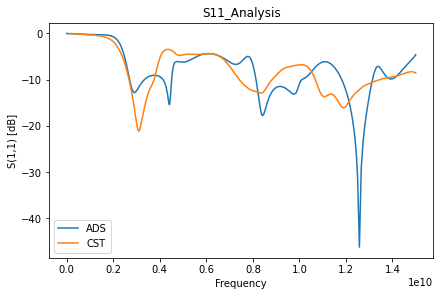

In [67]:
fig, ax = plt.subplots( layout = 'constrained')
ax.plot(df_ads['freq'], df_ads['S11_ADS'], label ='ADS')
ax.plot(df_cst['freq'], df_cst['S11_CST'], label ='CST')

ax.set_xlabel('Frequency')  # Add an x-label to the axes.
ax.set_ylabel('S(1,1) [dB]')  # Add a y-label to the axes.
ax.set_title('S11_Analysis')  # Add a title to the axes.
ax.legend()

In [72]:
xl = pd.ExcelFile('S11_ADS.xlsx')
sh_names = xl.sheet_names

for name in sh_names:
    print (name)

Sierpinski_simetric
Sierp_Patch_3rd
Sierp_Patch_2rd
MLIN_Slot_Circular_MoM
MLIN_Disc_Monopole_MoM
MLIN_Disc_Monopole_FEM
MLIN_Cardioid_Monopole_MoM
Log_P_Koch_Param_1
Koch_simetric
fit_67
CPW_Disc_Monopole_MoM
CPW_Disc_Monopole_FEM
CPW_Cardioid_Monopole_MoM
Bowtie_import
Planilha1
